<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220516%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 ch9.추천시스템 
1~4 pg. 562-579

> ## 9.1 추천 시스템의 개요와 배경

**추천 시스템의 개요**

유튜브, 애플 뮤직, 아마존, 이베이 - 추천엔진

**온라인 스토어의 필수 요소, 추천 시스템**


**추천 시스템의 유형**

* 콘텐츠 기반 필터링(Content based)
* 협업 필터링(Collaborative)
  * 최근접 이웃(Nearest Neighbor) 협업 필터링
    * 아마존
  * 잠재 요인(Latent Factor) 협업 필터링
    * 넷플릭스 추천 시스템 경연 대회 - 행렬 분해 기법

> ## 9.2 콘텐츠 기반 필터링 추천 시스템

: 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠(영화 - 장르, 감독, 출연 배우, 키워드)를 가진 다른 아이템 추천



> ## 9.3 최근접 이웃 협업 필터링 = 메모리 협업 필터링

: 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식만을 기반으로 추천 수행


* 목표: **사용자-아이템 평점 매트릭스**와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템 예측 평가하는 것.
  * 행: 개별 사용자
  * 열: 개별 아이템
  * 각 칸: 평점
  * *pivor_table()*:레코드 레벨 형태 -> 사용자-아이템 평점 행렬 형태


* **사용자 기반**
  * 행: 개별 사용자
  * 열: 개별 아이템
    * "당신과 비슷한 고객들이 다음 상품도 구매했습니다."


* **아이템 기반** - 더 높은 정확도
  * 행: 개별 아이템
  * 열: 개별 사용자
    * "이 상품을 선택한 고객들은 다음 상품도 구매했습니다."


> ## 9.4 잠재 요인 협업 필터링

### **잠재 요인 협업 필터링의 이해**

: 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측할 수 있게 하는 기법

행렬분해: 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출


* 알고리즘의 골자

*다차원 희소 행렬* **사용자-아이템 행렬** 

-> *저차원 밀집 행렬* **사용자-잠재 요인 행렬** & **잠재요인-아이템 행렬** *영화 장르 선호도&영화의 장르별 특성값*

=(내적)=> 새로운 **예측 사용자-아이템 행렬**



### **행렬 분해의 이해**

* SVD(Singular Vector Decomposition)
  * 행렬 분해, NaN값이 없는 행렬에만. (NaN 값 많으면 SGD, ALS)
* NMF(Non-Negative Matrix Factorization)

* R = P * Q.T *(M,N) = (M,K)X(K,N)
  * M: 총 사용자 수
  * N: 총 아이템 수
  * K: 잠재 요인의 차원 수
  * R: MXN 차원의 사용자-아이템 평점 행렬
  * P: 사용자의 잠재 요인과의 관계 값을 가지는 MXK 차원의 사용자-잠재 요인 행렬
  * Q: 아이템과 잠재 요인과의 관계 값을 가지는 NXK 차원의 아이템-잠재 요인 행렬
  * Q.T: Q 매트릭스의 행과 열 값을 교환한 전치 행렬



### **확률적 경사 하강법을 이용한 행렬 분해**
1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬로 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류 값을 가질 때까지 2,3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화

아래: 실제 값과 예측값의 오류 최소화와 L2규제를 고려한 비용 함수식

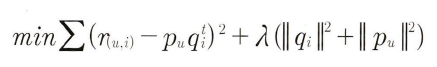

아래: 위 비용함수를 최소화하기 위해 업데이트된 값
* P_u: P 행렬의 사용자 u행 벡터
* Q^t_i: Q 행렬의 아이템 i행의 전치 벡터
* r(u,i): 실제 R 행렬의 u행, i열에 위치한 값
* r(u,i)^: 예측 R^ 행렬의 u행, i열에 위치한 값
* e(u,i): u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류
* 람다: SGD 학습률
* 감마: L2 규제 계수

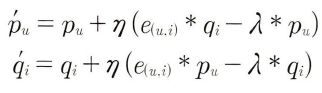

L2 규제를 반영해 실제 R 행렬 값과 예측 R 행렬 값의 차이를 최소화하는 방향성을 가지고 P 행렬과 Q 행렬에 업데이트 값을 반복적으로 수행하면서 최적화된 예측 R 행렬 구함

In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재요인 차원 K는 3 설정. 
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape
K=3

# P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 random한 값으로 입력합니다. 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [3]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps): #steps: SGD를 반복해서 업데이트할 횟수
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:]) #learning rate: SGD의 학습률, r_lambda: L2 규제 계수
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros) # 50회마다 오류값 출력
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse)

### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

In [4]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]


NaN이 아닌 값은 큰 차이X, NaN 값은 새로운 예측값